<a href="https://colab.research.google.com/github/lena110200/Class2022-spring/blob/master/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
시험 상당부분 나옴 
Spectrogram : 
signal(시간 축의 파형)이 있다고 할때 어떤 성분이 많은지가 중요. 낮음음, 높은음이 많은지 
/ 어떤 주파수가 많은지 입체적으로 보여줌 
spectrogram - 어떤 성분이 많은지 보는거 / x축는 시간 y는 주파수freq !!/ 높은쪽의 주파수가 많으면 빨강노랑으로 보임
어느 주파수부분이 많냐에 따라 '아'인지 '이'모음인지 구분가능 
일종의 산맥 형성. 일상적 소리는 하나의 사인곡선으로 만들어지는게 아니라 다양한 성분으로 합쳐져 있음 (악기, 목소리)
공명하는 다른 음들도 동시에 나는것 
휘파람 - 비교적 하나의 사인곡선과 비슷 / 드럼소리는 아래쪽  --> wave상에서는 볼수없음. 주파수분석을 해야함 
새소리는 위쪽, 높은 주파수 / 
스팩트럼 여러장이 시간축으로 나오고있는것. 
spectrogram : 한장의 스팩트럼을 시간축으로 concatenate한것 
아에이오우 각각 주파수 다름. 
x축 freq y축 amp : spectrum 이걸 시간축으로 쌓아놓고 입체로 본게 스팩트로그램 
-concatenate over time 
높은 주파스가 많으면 x 뒤쪽에 높게 

#inner product : 10hz를 inner product했는데 0.001이 나오면 given signal에 해당 주파수가 별로 없다는 뜻 
#왜 sine phasor안쓰고 complex phasor쓰나 ? phase sensitivity때문에. 

In [ ]:
praat- 패키지로 모아둔 프로그램 

pitch-음의 높낮이 
어디의 freq가 많은지 - 진하기 
'에'- 480hz, 2200hz, 2800hz에 강하게 
아- 800,1400에서 강함. 
view spectral slice - x축 freq 어떤 성분이 강한가 (산봉우리)

# Audio Processing
---

https://musiclab.chromeexperiments.com/Spectrogram/

### Fourier transform (분석용) : 스팩트럼 만드는데 들어가는 알고리즘 
* spectrum은 주어진 signal에 대해 어떤 주파수 성분이 많이 있나?
* spectrogram은 spectrum을 time 축으로 concatenate한 것
* 방법: signal (inner product) a series of complex phasors with different frequencies
-given signal이 있을때 다양한 사인곡선을 만드는것. 
다양한 fre를 갖도록
-given singal과 그것과 똑같은 길이의 complex phasor을 만들어서 inner product 
* inner product는 일종의 correlation (즉, 해당 frequency가 얼마나 있는지 probing)
-주파수 성분이 들어있다면 높은 cor 
-왜? 10hz를 얼마를 곱하면 그만큼 있다. 
* 왜? sine phasor 안 쓰나? phase sensitivity 때문
왜 complex? 
### Filter (변환용)
실제로 신호에 대해 변화를 줌. 
* A --> function -->  B
* signal A --> filter --> signal B
* 신호 (time function-x축이 time인거)를 입력으로 하는 함수를 filter라고 함
* 왜? filter 라고 부름? 이 함수의 목적이 특정 주파수에 대한 manipulation이므로.
(예: 어떤 주파수대를 작게, 크게, 통과, 제거 등)
* 방법: weighted sum of signal's shifts (두가지 방법: FIR, IIR) 

  * FIR: Y(k) = b<sub>1</sub>X(k) + b<sub>2</sub>X(k-1) + ... 
    - Y = H * X
  * IIR: a<sub>1</sub>Y(k) + a<sub>2</sub>Y(k-1) + ... = X(k)
    - Y = (1/H) * X

### Auto correlation
* measuring pitch / F0

### RMS: root mean square
* measuring intensity

In [ ]:
#반복되는 부분 - 미세한 떨림. 0.0072초가  1초에 몇번 들어있을까 = 140번 (1/0.007)->주파수
#auto cor : 옆으로 이동했을때 값이 비슷해지는 순간이 있음. 
#y축 cor, x축 lag / 안움직였을때 cor젤 높다가 내려갔다가 어느순간 다시 올라가는. 
#lag를 발생시켯을때 처음나타나는 cor의 peak를 이용. / lag의 시간이 패턴이 반복되는 시간과 동일 
#첫번째 나타나는 correlation의 새로운peak 가 패턴의 길이. 
#1/ 1st lag peak : auto cor 
#자기자신과의 cor -> auto 
#fo(pitch)값을 재는것 

#RMS : 0보다 높은거, 낮은거 있는데 그 값들을 다 제곱시켜서 그것의 mean값을 구함. 
#의미? 진폭을 더 크게 만듬. / 진폭을 재는것. 

In [ ]:
#filter - 어떤 신호에 대해 변형을 주는것. 
#오케스트라에서 저음부분을 약하게 하고 싶으면, '낮은 주파수 작게 해주세요.' 
#소리에 대해 변형가하고 싶을때는 주파수로 요청. 
#왜 필터라 불러? - 변형을 하면 함수라 부름. 소리도 변형을 할 수 있어 함수라 부를수도 잇지만 그래도 필터라는 말 더 씀.
#>>특정 주파수에 대한 조작이기 때문에  
#시그널을 바꾸는건 필터 
#x축이 time(time function)인게 신호 -> 변형-> 복사해서 한칸 옆으로 . 
#x(K) : one signal, x(K-1): 한칸 옮겨가면서
#1/2X(K) + 1/2X(K-1) : 중간값 <- filtered 된것 / 원래 라인은 삐죽한데 이건 완만한 산맥 
#IIR은 y(출력)에다가 곱해짐. 
#FIR은 b1,b2..만 알고있으면 끝./ IIR은Y에다가 곱해짐. 입력 그대로 두고 출력을 shift.  
#b1=1 or a1=1 나머진 0으로 하면 필터 효과 없음  

In [ ]:
inner product - 똑같은 길이의 숫자가 있을때 각각 곱하고 더하면 하나의 값이 나옴. 
같은 길이의 두 백터의 곱하고 더한것 -> cor의 정보를 줌. 
a+bi abs(a+bi) : 원점으로부터의 길이. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

### load / plot / play sound file

In [ ]:
# from google.colab import files
# fn = files.upload() - 컴퓨터에 파일이 있을때 
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"#깃텁에 있는 아에이오우 
os.system("curl " + url + " > aeiou.wav") 

s, sr = librosa.load('aeiou.wav') 
#48600개 백타의 value(1차원의 array) : s , /sr 1초에 22500 >># 2초 조금 넘음 

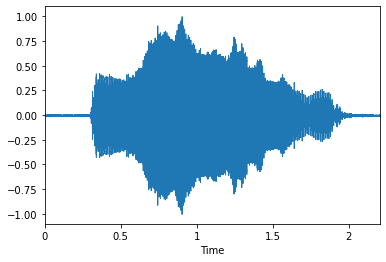

In [ ]:
s = librosa.util.normalize(s) 
#normalize를 하면 숫자값의 절대값의 최대값으로 모든 숫자를 나누기. (젤 위에 있는 숫자가 1이됨)
#>>1과 -1사이에 숫자가 나오도록. scale up or down 
# 젤 큰 숫자가 1이 되도록. 
librosa.display.waveplot(s, sr) #ploting 
ipd.Audio(s[7000:12000], rate=sr) # 7000~12000번째 샘플을 선택 -> '아' 모음이 있음 / 들어볼수있음 

### Fourier Transform(수학적 기법) for Spectrogram

In [ ]:
#'아'로 스팩트로그램 만들어. 
#스팩트로그램을 어떻게 만드냐 - 스팩트럼을 여러개 만들어야. 한장한장 옆으로 옮겨가면서 만들어 

In [ ]:
s_preemp = librosa.effects.preemphasis(s)

n_fft=512 #총 512개의 주파수 . 얼마나 촘촘하게 스팩트럼을 만드는지. x축을 512개로 나눔. 
hop_length=int(0.001*sr) # 한장한장사이 갭 
win_length=int(sr*0.008) #한장의 길이 
#0.008초짜리가 조금씩 이동해서 0.001만큼. 이런 스팩트럼이 여러개 쌓여서 스팩트로그램. 
#시험 : 한장의 스팩트럼은 밑 그림에서 뭘까 - 까만부분이 amp높은 부분. 입체적으로 
#스팩트로그램은 y가 freq .x가 시간 
spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann') #복소수값
#ft는 fourier transform 
magspec = np.abs(spec) 
# complex phasor이기 때문에 inner product의 값이 복소수라서 abs사용. a b 의 abs값은 원점으로부터의 거리 
#복소수 -> 실수 
dBspec = librosa.amplitude_to_db(magspec, ref=np.max) #실수가 나오면 데시벨의 형태로 

plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))
#까만부분이 솟아있는 부분. 
#ft - 분석용 !! 

### Filter for audio transformation

In [ ]:
from scipy.signal import lfilter #(b,a,x) ba는 array로 만들어줘야 
sig = s[7000:12000] #'아'부분 
sig = lfilter(np.array([1]), np.array([1]), sig, axis=0) #linear 필터 / 원래 소리 그대로임 둘다 1넣으면
#(b,a , sig) b,a array로 받아서 1 넣으면 소리가 원래 '아'소리 그대로. 
#np.array([1/2,1/2,1/2]) 넣으면 좀 부드러워짐  
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

### RMS(Root Mean Square) for intensity

In [ ]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

### Autocorrelation for pitch(F0) measurement

In [ ]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')